<a href="https://colab.research.google.com/github/zhanga15/Intacart-Market-Basket-Analysis/blob/main/MMA_2022W_869_Individual_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA 869: Individual Assignment

<font color='red'>\# TODO: fill in the below</font>

- [An Qi Zhang]
- [20255037]
- [A]
- [The Happiness Advantage]
- [2021/08/10]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python. You may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and scipy`.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2021-08-15 21:25:38.258182


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.7.11


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
# TODO: install any packages you need to here. For example:
#pip install unidecode
# TODO: install any packages you need to here. For example:
#pip install unidecode
# TODO: install any packages you need to here. For example:
#pip install unidecode

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every single posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a winner and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.


## 1.0: Load data 

In [7]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


EDA

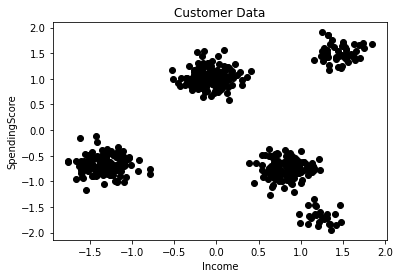

In [10]:
#Plot the raw data
plt.figure();

plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c="black");
plt.title("Customer Data");
plt.xlabel('Income');
plt.ylabel('SpendingScore');
plt.xticks();
plt.yticks();

In [8]:
#Normalize data
scaler = StandardScaler()
features = ['Age', 'Income', 'SpendingScore', 'Savings']
df = df1.copy()
df[features] = scaler.fit_transform(df[features])

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,505.0,5.672031e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.638154e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-1.954432e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103
Savings,505.0,-4.058360e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


## 1.1: Clustering Algorithm #1 - Kmeans

In [11]:
# According to the above graph we deterrmine the clusters number as #5. Applying k-means algorithm to the dataset.
X = df.copy()
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [12]:
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [14]:
# WCSS == Inertia
print(k_means.inertia_)

silhouette_score(X, k_means.labels_)

66.5111137485908


0.8048976287755765

Hyperparameter Tuning

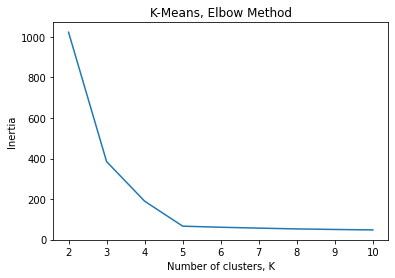

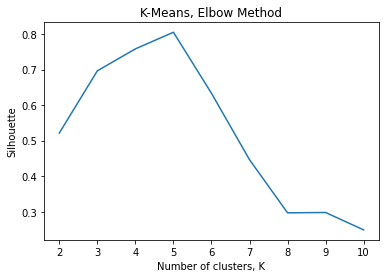

In [15]:
#Elbow Method
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

## 1.2: Clustering Algorithm #2 - Hierarchical


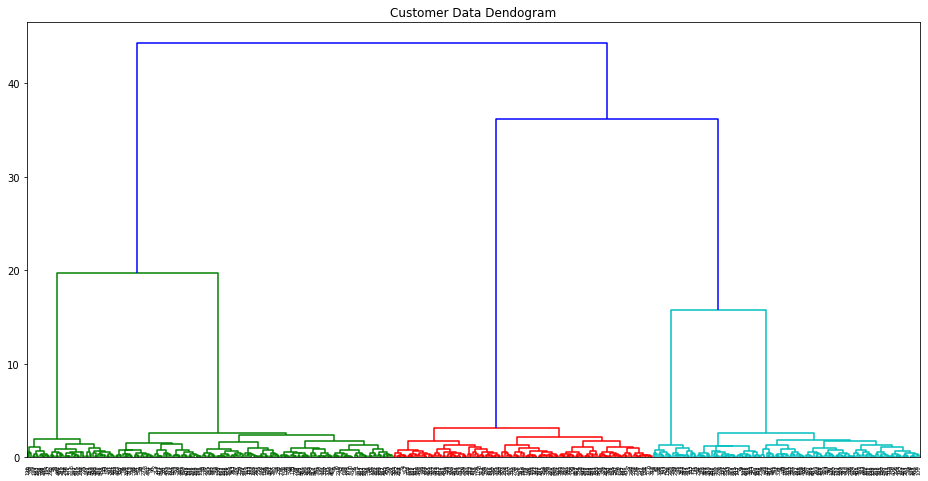

In [16]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Customer Data Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [17]:
#From above graph, the best cluster is 5
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [18]:
silhouette_score(X, agg.labels_)
# it has the same silhouette score as Kmeans

0.8048976287755765

In [19]:
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

Feature Means for each cluster

In [23]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:]))
    
means


Cluster 1 (n=50):
[    24.18 128029.12      0.9    4087.52]

Cluster 2 (n=157):
[   59.96 72448.06     0.77  6889.97]

Cluster 3 (n=147):
[   87.78 27866.1      0.33 16659.26]

Cluster 4 (n=25):
[    86.   119944.04      0.07  14808.68]

Cluster 5 (n=126):
[    32.78 105265.81      0.31  14962.78]


array([[-1.44,  1.46,  1.51, -1.57],
       [ 0.04, -0.09,  1.03, -1.01],
       [ 1.19, -1.33, -0.68,  0.97],
       [ 1.12,  1.24, -1.68,  0.6 ],
       [-1.09,  0.83, -0.75,  0.63]])

For Each Cluster, Show Feature Stats

In [26]:
from scipy import stats

col_names = X.columns

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(X[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 505


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,59.02,97.00,83.18,57.56,24.79
Income,12000.00,75513.29,142000.00,111541.90,70425.76,30539.63
SpendingScore,0.00,0.51,1.00,0.76,0.57,0.14
Savings,0.00,11862.46,20000.00,16816.59,10068.59,4685.19



Cluster 1:
Number of Instances: 50


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,24.18,31.00,59.58,49.02,45.82
Income,117108.00,128029.12,142000.00,76413.35,86686.66,52197.55
SpendingScore,0.81,0.90,1.00,0.51,0.55,0.44
Savings,0.00,4087.52,6089.48,12192.66,6842.94,18038.91



Cluster 2:
Number of Instances: 157


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,51.00,59.96,68.00,59.49,63.48,52.66
Income,56321.00,72448.06,90422.00,76596.27,80762.80,76774.09
SpendingScore,0.66,0.77,0.91,0.51,0.61,0.58
Savings,4077.66,6889.97,10547.78,12086.41,13179.50,14336.46



Cluster 3:
Number of Instances: 147


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,79.00,87.78,97.00,59.53,58.71,47.69
Income,12000.00,27866.10,46977.00,76669.86,80132.22,81449.08
SpendingScore,0.20,0.33,0.47,0.51,0.59,0.63
Savings,13470.97,16659.26,20000.00,12145.91,11114.44,11991.20



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,77.00,86.00,93.00,59.58,56.77,58.46
Income,110582.00,119944.04,128596.00,76192.26,76326.08,48538.51
SpendingScore,0.00,0.07,0.16,0.51,0.62,0.36
Savings,12554.69,14808.68,17833.09,12134.30,14948.38,14021.13



Cluster 5:
Number of Instances: 126


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,22.00,32.78,44.00,59.62,62.86,66.99
Income,89598.00,105265.81,119877.00,76541.57,76634.13,64585.25
SpendingScore,0.17,0.31,0.41,0.51,0.45,0.51
Savings,12207.53,14962.78,17968.55,12090.45,12134.49,10963.23


## 1.3 Model Comparison

I tried K means and Hierarchical algorithms for this dataset. Each method has its own pros and cons, comparing them in the following approach: performance, interpretation and runtime, I think Hierarchical is the best clustering model for this dataset.

From above result, we can see both models Kmeans and Hierarchical have the same silhouette score which is 0.8048, therefore, the performance is indifferent.

Additionally, this is a tiny dataset which only has 505 instances and 4 features. Since each feature is useful to determine the accurate clusters, we cannot simply drop any features in this case. Therefore, in the K means algorithm, it's hard to do the clustering visulization using 4 columns as it only supports 2D or 3D graph. However, Hierarchical clustering is capable viewing clusters on dendrogram which is tree based graph that can easily demonstrate how different sub-clusters relate to each other, and how far apart data points are. Hence, the Hierarchical clustering is easier to interpret.

In the runtime comparsion, since the dataset is limited, there is not much difference between K Means and Hierarchical clustering in this case. But we all lnow Hierarchical clustering can’t handle big data well due to the time complexity.

In conclusion, Hierarchial is the better option for this data.

## 1.4 Personas

Examplars

In [27]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X_tmp).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(df1.iloc[[exemplar_idx]])


Cluster 1:


,Age,Income,SpendingScore,Savings
95,25,130934,0.91,3942.39



Cluster 2:


,Age,Income,SpendingScore,Savings
467,61,72027,0.76,6926.12



Cluster 3:


,Age,Income,SpendingScore,Savings
335,89,26940,0.33,16555.16



Cluster 4:


,Age,Income,SpendingScore,Savings
155,86,115689,0.06,14803.15



Cluster 5:


,Age,Income,SpendingScore,Savings
405,34,103204,0.30,15149.81


Cluster 1 : Well-paid Millennials.
- Young professionals with high spending score and little savings. This is very common in the young age group such as FLAAG developers, investment banking analyst, etc. They have high annual income but also spend a lot to keep their high standard life, hence they have a little saving.  

Cluster 2: Middle-class senior people  
- Elder people who have average income and relative high spending score but little savings is a representation of this cluster. For example, senior people are going to retire soon. 

Cluster 3 : Retired people live on RRSPs
- Old age people rely on Government pension like RRSPs as their main income source, therefore, they have low spending score and savings but for emergency purpose only. 

Cluster 4: Rich retired people
- In this cluster, senior people have very high income even after they retired. They probably lives on investment returns like properties or stocks but they have extremely low spending score and average savings. 

Cluster 5 : Middle-class parents  
-  Most of People in this group are parents already, they have exceed average income but low spending score and medium savings. Possibly they want to save more money for their children therefore they limit their daily expenses.

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

High support indicates the itemset is frequently purchased in all the transactions. High confidence means the customer has high interest to purchase the itemset given one item is purchased. In this case, `{milk} -> {bread}` is a good example to demonstrate this rule. In the grocery store transaction data, milk and bread are very frequent appeared in each customer's shopping list since this is the most common breakfast combo. Therefore, as it mentioned in the above, this rule it too straightforward, therefore, Uncel Steve will not be interested.


## 2.2: A rule that might have reasonably high support but low confidence.

`{Greeting Cards} -> {Roses}` is an example of itemset have reasonably high support but low confidence. Buying Greeting Cards and Roses is very common showing in the transaction data. However, it might have relative low confidence because people who buy greeting cards are not guarteend to purchase roses everytime since people have various purpose to send out greeting cards such as kids' birthday, promotion, etc. This rule is less obvious, thus I think Uncle Steve will be interested.

## 2.3: A rule that might have low support and low confidence.

For itemset has low support and low confidence, `{Coke Cola} -> {Vitamin}` would be a good fit. Both items are popular in the customer's bill, however, they are less likely to be in the same itemset. People purchase Vitamin means they would like to keep their body in healthy condition but drinking Coke Cola has the reverse effect, hence it has low confidence. This rule is also a common sense so it's less interesting.

## 2.4: A rule that might have low support and high confidence.

 `{Cigarattes} -> {lighter}` has low support and high confidence. The reason why I am thinking this has low support because it's less likely people will buy them during their grocory shopping. It has high confidence since people who buy cigarattes have very high probabilities to purchase a lighter altogether as this is easy to forget to bring it all time. This is an interesring rule because Uncle Steve may think this itemset is high support and high confidence which is not accurate enough.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [28]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [29]:
#change categorical variable to dummy variable
cate_col = ['Sex', 'City', 'Purpose']
def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)

X_train = PerformOneHotEncoding(X_train,cate_col)

X_train_base = X_train.copy()

In [30]:
X_train_base.drop(['UserID', 'FirstName', 'LastName', 'Street', 
              'LicensePlate', 'DateOfBirth'], axis=1, inplace=True)

In [31]:
#split data
X_tr_base, X_te_base, y_tr_base, y_te_base = train_test_split(X_train_base, y_train, test_size=0.2, random_state=42)

In [32]:
print(X_tr_base.shape)
print(X_te_base.shape)

(3840, 37)
(960, 37)


In [41]:
#Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

keep_features = X_tr_base.columns

clf = DecisionTreeClassifier(random_state=42, max_depth=5)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('keep_and_do_nothing', 'passthrough', keep_features),
        ],
        remainder = 'drop')

pipe1 = Pipeline(steps=[("preprocessor", preprocessor1), ("clf", clf)])

scores1 = cross_val_score(pipe1, X_tr_base, y_tr_base, 
                          scoring='f1_macro', cv=10, n_jobs=-1)
print(scores1)

print(np.mean(scores1))


[0.59 0.69 0.72 0.6  0.68 0.64 0.7  0.73 0.69 0.7 ]
0.6726724245065869


In [34]:
pipe1 = pipe1.fit(X_tr_base, y_tr_base)

y_pred_base = pipe1.predict(X_te_base)
print(classification_report(y_te_base, y_pred_base))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       803
           1       0.46      0.43      0.44       157

    accuracy                           0.82       960
   macro avg       0.67      0.66      0.67       960
weighted avg       0.82      0.82      0.82       960



## 3.2: Feature engineering

Feature 1: Feature Scaling

In [35]:
#Normalize data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_train[['Amount']])
X_train['Amount_Scaled']= scaler.transform(X_train[['Amount']])   

scaler = preprocessing.MinMaxScaler().fit(X_train[['Duration']])
X_train['Duration_Scaled']= scaler.transform(X_train[['Duration']])   

Feature 2: Age

In [36]:
# calculate age as of today
X_train['birth_year'] = pd.to_datetime(X_train["DateOfBirth"]).dt.strftime('%Y').astype(int)
X_train['Age'] = X_train.apply(lambda x: 2021 - x.birth_year, axis=1)

Feature 3: Interaction term Amount X Default

In [37]:
X_train['Amount*Default'] = X_train.apply(lambda x: x.PreviousDefault * x.Amount, axis=1)

In [38]:
X_train_base2 = X_train.drop(['UserID', 'FirstName', 'LastName', 'Street', 
              'LicensePlate', 'DateOfBirth', 'birth_year'], axis=1).copy()

In [39]:
#split data
X_tr_base2, X_te_base2, y_tr_base2, y_te_base2 = train_test_split(X_train_base2, y_train, 
                                                              test_size=0.2, random_state=42)

In [40]:
#Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

keep_features = X_tr_base2.columns

clf = DecisionTreeClassifier(random_state=42, max_depth=5)

preprocessor1 = ColumnTransformer(
    transformers=[
        ('keep_and_do_nothing', 'passthrough', keep_features),
        ],
        remainder = 'drop')

pipe1 = Pipeline(steps=[("preprocessor", preprocessor1), ("clf", clf)])

scores1 = cross_val_score(pipe1, X_tr_base2, y_tr_base2, 
                          scoring='f1_macro', cv=10, n_jobs=-1)
print(scores1)

print(np.mean(scores1))

[0.75 0.76 0.78 0.78 0.79 0.77 0.77 0.77 0.76 0.81]
0.773419873385657


In [42]:
pipe1 = pipe1.fit(X_tr_base2, y_tr_base2)

y_pred_base2 = pipe1.predict(X_te_base2)
print(classification_report(y_te_base2, y_pred_base2))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       803
           1       0.46      0.43      0.44       157

    accuracy                           0.82       960
   macro avg       0.67      0.66      0.67       960
weighted avg       0.82      0.82      0.82       960



## 3.3: Feature selection

Univariate Feature Selection

In [43]:
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(chi2, k=10)
sel = sel.fit(X_tr_base2, y_tr_base2)

X_train_new = sel.transform(X_tr_base2)
X_test_new = sel.transform(X_te_base2)

X_train_new.shape

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train_new, y_tr_base2)

y_pred_fe = clf.predict(X_test_new)
print(classification_report(y_te_base2, y_pred_fe))

(3840, 10)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       803
           1       0.64      0.54      0.59       157

    accuracy                           0.88       960
   macro avg       0.78      0.74      0.76       960
weighted avg       0.87      0.88      0.87       960



Selecting the best 10 features increase the model f1-macro score to 0.76

## 3.4: Hyperparameter tuning

Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

params = {'criterion': ('gini', 'entropy'), 
          'splitter': ('best', 'random'), 
          'class_weight': ('balanced', None), 
          'max_depth': [2, 5, 10, 20], 
          'min_samples_leaf': [1, 5, 10],
          'max_features':[0.25, 0.5, 0.75, 1.0]}

search_gs = GridSearchCV(clf, params, scoring='f1_macro', cv=10, verbose=1)
search_gs = search_gs.fit(X_train_new, y_tr_base2)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:   23.8s finished


In [45]:
y_pred_gs = search_gs.predict(X_test_new)
print(classification_report(y_te_base2, y_pred_gs))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       803
           1       0.60      0.63      0.62       157

    accuracy                           0.87       960
   macro avg       0.77      0.77      0.77       960
weighted avg       0.87      0.87      0.87       960



Applying the Grid Search slightly improves f1 score of the model which means this technique is useful for this dataset

In [46]:
search_gs.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'splitter': 'random'}

Random Search

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

clf = DecisionTreeClassifier(random_state=42)

params = {"criterion": ["gini", "entropy"],
          "splitter": ["best", "random"],
          "class_weight": ['balanced', None], 
          "max_depth": randint(2, 21),
          "min_samples_leaf": randint(1, 11),
          "max_features": uniform(0.0, 1.0)}

search_rs = RandomizedSearchCV(clf, param_distributions=params, n_iter=1000, scoring='f1_macro', cv=10, verbose=1)
search_rs = search_rs.fit(X_train_new, y_tr_base2)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   56.8s finished


In [48]:
y_pred_rs = search_rs.predict(X_test_new)
print(classification_report(y_te_base2, y_pred_rs))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       803
           1       0.65      0.53      0.58       157

    accuracy                           0.88       960
   macro avg       0.78      0.74      0.76       960
weighted avg       0.87      0.88      0.87       960



The random search didn't improve the model performance, therefore the Grid Search is the option that I am going to choose

## 3.5: Performance estimation

Apply the above approach to test data



In [49]:
#change categorical variable to dummy variable
cate_col = ['Sex', 'City', 'Purpose']
def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)

X_test = PerformOneHotEncoding(X_test,cate_col)

Features 

In [50]:
#Normalize data
scaler = preprocessing.MinMaxScaler().fit(X_test[['Amount']])
X_test['Amount_Scaled']= scaler.transform(X_test[['Amount']])   

scaler = preprocessing.MinMaxScaler().fit(X_test[['Duration']])
X_test['Duration_Scaled']= scaler.transform(X_test[['Duration']])

# calculate age as of today
X_test['birth_year'] = pd.to_datetime(X_test["DateOfBirth"]).dt.strftime('%Y').astype(int)
X_test['Age'] = X_test.apply(lambda x: 2021 - x.birth_year, axis=1)

#Interaction term
X_test['Amount*Default'] = X_test.apply(lambda x: x.PreviousDefault * x.Amount, axis=1)

In [51]:
X_test2 = X_test.drop(['UserID', 'FirstName', 'LastName', 'Street', 
              'LicensePlate', 'DateOfBirth', 'birth_year'], axis=1).copy()

In [52]:
#split data
X_tr_te, X_te_te, y_tr_te, y_te_te = train_test_split(X_test2, y_test, 
                                                              test_size=0.2, random_state=42)

Feature Selection

In [53]:
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(chi2, k=10)
sel = sel.fit(X_tr_te, y_tr_te)

X_train_new = sel.transform(X_tr_te)
X_test_new = sel.transform(X_te_te)

In [54]:
clf = DecisionTreeClassifier(random_state=42)

params = {'criterion': ('gini', 'entropy'), 
          'splitter': ('best', 'random'), 
          'class_weight': ('balanced', None), 
          'max_depth': [2, 5, 10, 20], 
          'min_samples_leaf': [1, 5, 10],
          'max_features':[0.25, 0.5, 0.75, 1.0]}

search_gs_te = GridSearchCV(clf, params, scoring='f1_macro', cv=10, verbose=1)
search_gs_te = search_gs_te.fit(X_train_new, y_tr_te)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:   12.0s finished


In [55]:
y_pred_gs_te = search_gs_te.predict(X_test_new)
print(classification_report(y_te_te, y_pred_gs_te))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       198
           1       0.79      0.71      0.75        42

    accuracy                           0.92       240
   macro avg       0.87      0.84      0.85       240
weighted avg       0.91      0.92      0.91       240



The model perfoms better on the test data which has 0.85 f1 score

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



#Solution

- Cost details:
- Repair turbine  = 20000
- Maintenece and Inspection = 2000 + 500 = 2500
- Total cost = total actual fail * repair cost = (201+55) * 20000 = \$5,120,000 


- Random Forest Model Cost: (201 + 50) * 2500 + 55 * 20000 = \$1,727,500

- RNN Model Cost: (226 + 1200) * 2500 + 30 * 20000 = \$4,165,000
   
From above calculation, we can see both two models have less cost compare to original cost. The best option is Random Forest Model since it has lowest cost.